**Задание**

1. Для студентов с четным порядковым номером в группе – датасет с [классификацией грибов](https://archive.ics.uci.edu/ml/datasets/Mushroom), а нечетным – [датасет с данными про оценки студентов инженерного и педагогического факультетов](https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation) (для данного датасета нужно ввести метрику: студент успешный/неуспешный на основании грейда)
2. Отобрать **случайным** образом sqrt(n) признаков
3. Реализовать без использования сторонних библиотек построение дерева решений  (дерево не бинарное, numpy и pandas использовать можно, использовать список списков  для реализации  дерева - нельзя) для решения задачи бинарной классификации 
4. Провести оценку реализованного алгоритма с использованием Accuracy, precision и recall
5. Построить кривые AUC-ROC и AUC-PR (в пунктах 4 и 5 использовать библиотеки нельзя)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73)
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

### data analysis

In [5]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [6]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [5]:
df = pd.concat([X, y], axis=1)
features = X.columns
target = 'poisonous'
df 

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [9]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [10]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'missing_values': missing_values,
    'percentage': missing_percentage
}).sort_values(by='missing_values', ascending=False)

print(missing_summary)


                          missing_values  percentage
stalk-root                          2480   30.526834
cap-shape                              0    0.000000
stalk-surface-below-ring               0    0.000000
habitat                                0    0.000000
population                             0    0.000000
spore-print-color                      0    0.000000
ring-type                              0    0.000000
ring-number                            0    0.000000
veil-color                             0    0.000000
veil-type                              0    0.000000
stalk-color-below-ring                 0    0.000000
stalk-color-above-ring                 0    0.000000
stalk-surface-above-ring               0    0.000000
cap-surface                            0    0.000000
stalk-shape                            0    0.000000
gill-color                             0    0.000000
gill-size                              0    0.000000
gill-spacing                           0    0.

In [11]:
print('unique values:\n')
for column in features:
    print(f"{column}: {df[column].nunique()}")

unique values:

cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 4
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


### preprocessing data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)
label_encoder = LabelEncoder()
df['poisonous'] = label_encoder.fit_transform(df['poisonous'])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), features)
    ],
    remainder='passthrough' 
)
X = df[features]
y = df[target]
X_encoded = preprocessor.fit_transform(X)

### random feature selection

In [27]:
def select_random_features(X, n_features):
    np.random.seed(88)
    selected_indices = np.random.choice(X.shape[1], size=n_features, replace=False)
    return X[:, selected_indices]

In [28]:
n_random_features = int(X_encoded.shape[1])
X_encoded_selected = select_random_features(X_encoded, n_random_features)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_selected, y, test_size=0.2, random_state=88)

In [29]:
print(f'X_encoded (all features): {X_encoded.shape}')
print(f'X_encoded_selected (sqrt(n) features): {X_encoded_selected.shape}')
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')
print(f'X_test: {X_test.shape}\ny_test: {y_test.shape}')

X_encoded (all features): (8124, 94)
X_encoded_selected (sqrt(n) features): (8124, 94)
X_train: (6499, 94)
y_train: (6499,)
X_test: (1625, 94)
y_test: (1625,)


In [46]:
import numpy as np
from graphviz import Digraph

class DecisionTreeClassifierImplementation:
    def __init__(self, max_depth=5, criterion='entropy'):
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None

    def _entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _info_gain(self, y, y_left, y_right):
        n = len(y)
        n_left, n_right = len(y_left), len(y_right)
        if self.criterion == 'entropy':
            parent_metric = self._entropy(y)
            weighted_metric = (n_left / n) * self._entropy(y_left) + (n_right / n) * self._entropy(y_right)
        elif self.criterion == 'gini':
            parent_metric = self._gini(y)
            weighted_metric = (n_left / n) * self._gini(y_left) + (n_right / n) * self._gini(y_right)
        return parent_metric - weighted_metric

    def _best_split(self, X, y):
        if isinstance(X, np.ndarray):
            X_dense = X
        else:
            X_dense = X.toarray()

        best_feature, best_threshold, best_info_gain = None, None, -float('inf')
        for feature in range(X_dense.shape[1]):
            thresholds = np.unique(X_dense[:, feature])
            for threshold in thresholds:
                left_mask = X_dense[:, feature] <= threshold
                right_mask = ~left_mask
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue
                
                info_gain = self._info_gain(y, y[left_mask], y[right_mask])
                if info_gain > best_info_gain:
                    best_feature, best_threshold, best_info_gain = feature, threshold, info_gain
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth):
        if not isinstance(X, np.ndarray):
            X = X.toarray()

        if len(np.unique(y)) == 1 or depth >= self.max_depth:
            return {'label': np.bincount(y).argmax()}
        
        feature, threshold = self._best_split(X, y)
        if feature is None:
            return {'label': np.bincount(y).argmax()}

        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask

        return {
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }


    def fit(self, X, y):
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        self.tree = self._build_tree(X, y, 0)

    def _predict(self, x, tree):
        if 'label' in tree:
            return tree['label']
        if not isinstance(x, np.ndarray):
            x = x.toarray().flatten()
        if x[tree['feature']] <= tree['threshold']:
            return self._predict(x, tree['left'])
        return self._predict(x, tree['right'])

    def predict(self, X):
        return np.array([self._predict(x, self.tree) for x in X])
    
    def predict_proba(self, X):
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        
        probas = np.zeros((X.shape[0], 2))  # Для бинарной классификации
        for i, x in enumerate(X):
            probas[i, 0] = 1 - self._predict(x, self.tree)  # Вероятность класса 0
            probas[i, 1] = self._predict(x, self.tree)  # Вероятность класса 1
        return probas


    def visualize(self, feature_names):
        dot = Digraph()
        self._add_nodes_edges(dot, self.tree, feature_names, node_id=0)
        return dot

    def _add_nodes_edges(self, dot, tree, feature_names, node_id):
        if 'label' in tree:
            dot.node(str(node_id), f"Class: {tree['label']}", shape='box', style='filled', color='lightblue')
            return node_id

        feature = feature_names[tree['feature']]
        threshold = tree['threshold']

        dot.node(str(node_id), f"{feature} <= {threshold:.2f}")

        left_id = node_id + 1
        dot.edge(str(node_id), str(left_id), label="Yes")
        left_id = self._add_nodes_edges(dot, tree['left'], feature_names, left_id)

        right_id = left_id + 1
        dot.edge(str(node_id), str(right_id), label="No")
        right_id = self._add_nodes_edges(dot, tree['right'], feature_names, right_id)

        return right_id


### metrics 

In [47]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if tp + fp > 0 else 0

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if tp + fn > 0 else 0

def evaluate_model(y_true, y_pred):
    acc = accuracy(y_true, y_pred)
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return acc, prec, rec


In [48]:
tree_entropy = DecisionTreeClassifierImplementation(max_depth=5, criterion='entropy')
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)

tree_gini = DecisionTreeClassifierImplementation(max_depth=5, criterion='gini')
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)

acc_entropy, prec_entropy, rec_entropy = evaluate_model(y_test, y_pred_entropy)
acc_gini, prec_gini, rec_gini = evaluate_model(y_test, y_pred_gini)

print("Entropy-based Tree:")
print(f"Accuracy: {acc_entropy:.4f}, Precision: {prec_entropy:.4f}, Recall: {rec_entropy:.4f}")

print("\nGini-based Tree:")
print(f"Accuracy: {acc_gini:.4f}, Precision: {prec_gini:.4f}, Recall: {rec_gini:.4f}")


Entropy-based Tree:
Accuracy: 0.9994, Precision: 1.0000, Recall: 0.9987

Gini-based Tree:
Accuracy: 0.9969, Precision: 0.9950, Recall: 0.9987


### visualisation 

In [37]:
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
dot = tree_entropy.visualize(feature_names)
dot.view("decision_tree_mushrooms")

'decision_tree_mushrooms.pdf'

### cross-validation

In [49]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

def cross_validate_model(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=88) 
    accuracies = []
    precisions = []
    recalls = []

    y = np.array(y)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='binary'))
        recalls.append(recall_score(y_test, y_pred, average='binary'))
    
    return {
        "accuracy": np.mean(accuracies),
        "precision": np.mean(precisions),
        "recall": np.mean(recalls)
    }


tree_entropy = DecisionTreeClassifierImplementation(max_depth=5, criterion='entropy')
tree_gini = DecisionTreeClassifierImplementation(max_depth=5, criterion='gini')

cv_results_entropy = cross_validate_model(tree_entropy, X_train, y_train, cv=5)
print("Entropy-based Tree (Cross-Validation):")
print(f"Accuracy: {cv_results_entropy['accuracy']:.4f}, Precision: {cv_results_entropy['precision']:.4f}, Recall: {cv_results_entropy['recall']:.4f}")

cv_results_gini = cross_validate_model(tree_gini, X_train, y_train, cv=5)
print("\nGini-based Tree (Cross-Validation):")
print(f"Accuracy: {cv_results_gini['accuracy']:.4f}, Precision: {cv_results_gini['precision']:.4f}, Recall: {cv_results_gini['recall']:.4f}")


Entropy-based Tree (Cross-Validation):
Accuracy: 0.9995, Precision: 1.0000, Recall: 0.9990

Gini-based Tree (Cross-Validation):
Accuracy: 0.9966, Precision: 0.9949, Recall: 0.9981


### AUC_ROC and AUC_PR
1. sklearn
2. custom 

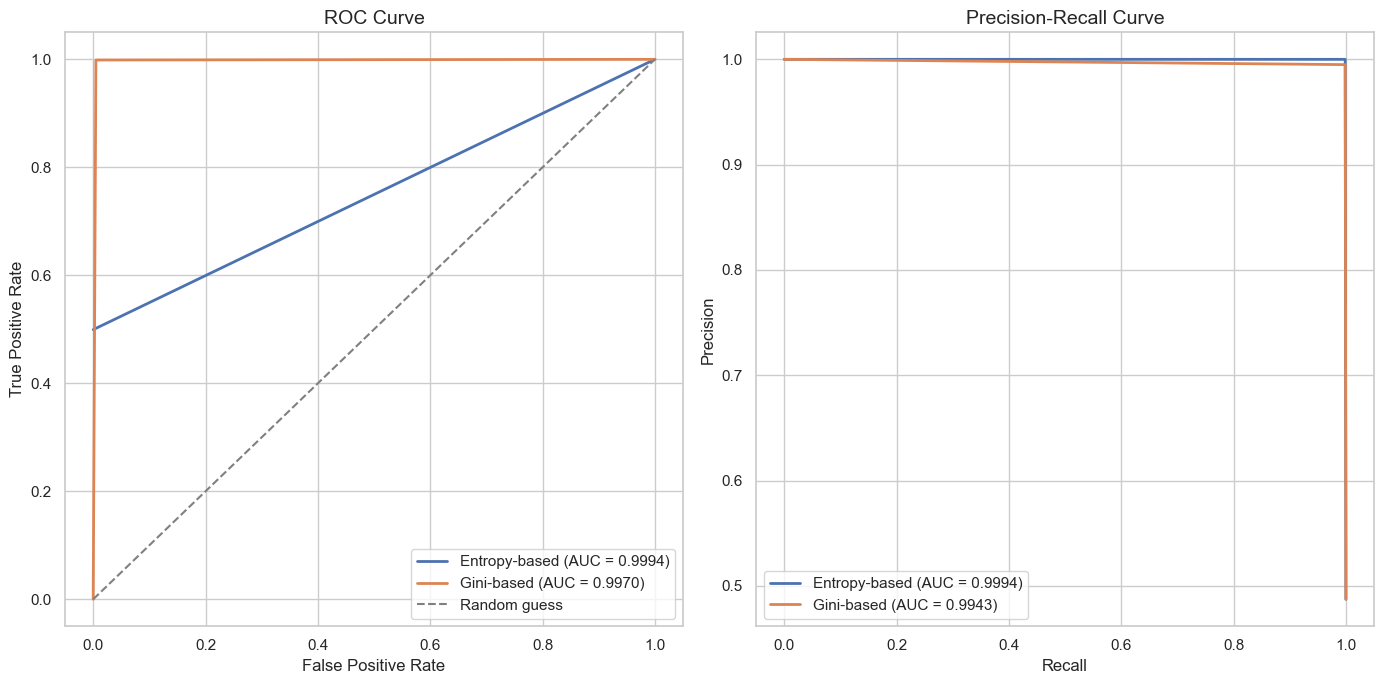

AUC-ROC (Entropy-based): 0.9994
AUC-ROC (Gini-based): 0.9970
AUC-PR (Entropy-based): 0.9994
AUC-PR (Gini-based): 0.9943


In [55]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_probs = {
    'Entropy-based': tree_entropy.predict_proba(X_test)[:, 1],
    'Gini-based': tree_gini.predict_proba(X_test)[:, 1]
}

y_true = y_test

roc_data = {}
pr_data = {}

for model_name, y_prob in y_probs.items():
    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)
    
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    pr_data[model_name] = (precision, recall, pr_auc)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    sns.lineplot(x=fpr, y=tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2)
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
for model_name, (precision, recall, pr_auc) in pr_data.items():
    sns.lineplot(x=recall, y=precision, label=f'{model_name} (AUC = {pr_auc:.4f})', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

for model_name, (_, _, roc_auc) in roc_data.items():
    print(f"AUC-ROC ({model_name}): {roc_auc:.4f}")

for model_name, (_, _, pr_auc) in pr_data.items():
    print(f"AUC-PR ({model_name}): {pr_auc:.4f}")


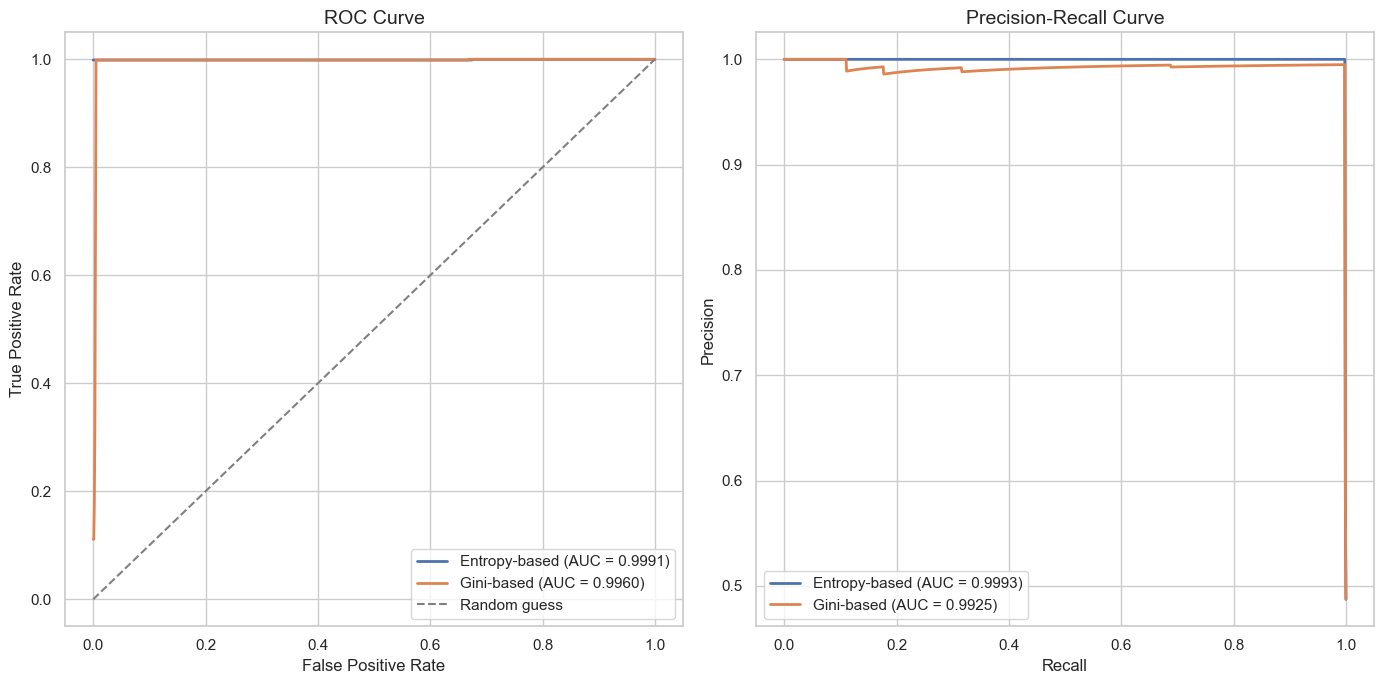

AUC-ROC (Entropy-based): 0.9991
AUC-ROC (Gini-based): 0.9960
AUC-PR (Entropy-based): 0.9993
AUC-PR (Gini-based): 0.9925


In [64]:
from numpy import interp

y_probs = {
    'Entropy-based': tree_entropy.predict_proba(X_test)[:, 1],
    'Gini-based': tree_gini.predict_proba(X_test)[:, 1]
}

y_true = y_test.to_numpy() 

roc_data = {}
pr_data = {}

def calculate_roc(y_true, y_prob):
    sorted_indices = np.argsort(y_prob)[::-1]
    y_true_sorted = y_true[sorted_indices]
    
    tpr = np.cumsum(y_true_sorted) / np.sum(y_true == 1)
    fpr = np.cumsum(1 - y_true_sorted) / np.sum(y_true == 0)
    
    tpr = np.concatenate(([0], tpr))
    fpr = np.concatenate(([0], fpr))
    
    fpr_interp = np.linspace(0, 1, 1000)
    tpr_interp = interp(fpr_interp, fpr, tpr)
    
    auc_roc = np.trapz(tpr_interp, fpr_interp)
    
    return fpr_interp, tpr_interp, auc_roc

def calculate_pr(y_true, y_prob):
    sorted_indices = np.argsort(y_prob)[::-1]
    y_true_sorted = y_true[sorted_indices]
    
    tp = np.cumsum(y_true_sorted)
    fp = np.cumsum(1 - y_true_sorted)
    
    precision = tp / (tp + fp)
    recall = tp / np.sum(y_true == 1)
    
    recall_interp = np.linspace(0, 1, 1000)
    precision_interp = interp(recall_interp, recall, precision)
    
    auc_pr = np.trapz(precision_interp, recall_interp)
    
    return precision_interp, recall_interp, auc_pr

for model_name, y_prob in y_probs.items():
    # ROC curve
    fpr, tpr, roc_auc = calculate_roc(y_true, y_prob)
    roc_data[model_name] = (fpr, tpr, roc_auc)
    
    # Precision-Recall curve
    precision, recall, pr_auc = calculate_pr(y_true, y_prob)
    pr_data[model_name] = (precision, recall, pr_auc)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# ROC
plt.subplot(1, 2, 1)
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    sns.lineplot(x=fpr, y=tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2)
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')

# Precision-Recall
plt.subplot(1, 2, 2)
for model_name, (precision, recall, pr_auc) in pr_data.items():
    sns.lineplot(x=recall, y=precision, label=f'{model_name} (AUC = {pr_auc:.4f})', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

for model_name, (_, _, roc_auc) in roc_data.items():
    print(f"AUC-ROC ({model_name}): {roc_auc:.4f}")

for model_name, (_, _, pr_auc) in pr_data.items():
    print(f"AUC-PR ({model_name}): {pr_auc:.4f}")
